<순서>

1.데이터 자료 수집 : 데이터 분석의 첫 단계로, 분석할 데이터를 수집. 이 단계에서 데이터의 출처와 형식을 정확히 확인

2.수집자료 불러오기 : 수집한 데이터를 적절한 형식으로 불러와서 사용 가능한 형태로 가공

3.데이터프레임 타입 확인 : 데이터프레임을 불러온 후, 데이터의 구조와 타입을 확인

4.결측치 확인 : 데이터프레임에서 결측치(missing values)가 있는지 확인

5.결측치 있으면 처리 : 결측치가 있을 경우, 적절한 방법으로 대체하거나 제거

6.기초통계량 확인 : 데이터의 대략적인 분포와 통계적 특성을 파악하기 위해 기초통계량을 확인. 평균, 중앙값, 표준편차 등을 확인

7.레그플롯, 박스플롯, 히스토그램 : 해당 그래프들을 이용하여 이상치 있는지 확인 및 도수분포 확인

8.이상치 제거 : 이상치가 발견되면 query함수를 이용하여 제외시킴

9.레그플롯, 히스토그램(도수 분포 제대로 됬는지 확인) 재확인 : 이상치 제거 후 분석 진행 전 더블 체크하기

10.신뢰구간 확인 : 데이터의 통계적 신뢰도를 파악하기 위해 신뢰구간을 확인. 이는 결과의 신뢰성을 판단하는데 도움을 줌

11.정규분포가정(정규성 검정 대체) : 정규성 가정을 확인하기 위해 왜도,첨도를 구해 정규분포를 따르는지 확인함. 

12.각 요인별 상관관계 확인 : 산점도 행렬 및 히트맵 그래프를 이용하여 각 요인들간에 상관관계 있는 지 파악

13.표준화 : 분석에 사용할 변수를 표준화하여 변수 간 스케일 차이를 해소하고 분석 결과를 더욱 해석하기 쉽게 만듦

14.pca(주성분) 분석 : PCA(주성분 분석)를 사용하여 변수 간 상관관계를 파악하고 차원 축소를 통해 데이터의 변수 수를 줄임

15.데이터 분석: 회귀분석을 사용하여 데이터 간 관계를 파악하고 해석

16.그래프,차트 제시 : 분석 결과를 시각화하여 보다 명확하게 전달하고, 그래프와 차트를 통해 패턴과 관계를 시각적으로 확인

17.결론 제시 및 ppt제작 : 분석 결과를 바탕으로 결론을 도출하고, PPT나 보고서 형식으로 결과를 제시

In [75]:
#패키지 참조

from pandas import read_excel, DataFrame, merge, cut, get_dummies
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy import stats
import seaborn as sb
import numpy as np
import sys
import os
from scipy.stats import t
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from math import sqrt

from sklearn.decomposition import PCA #주성분 분석용 패키지
from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import myOls, getConfidenceInterval, pearson_r, spearman_r,scalling, prettyPrint

In [76]:
#총생활비에 영향을 미치는 요소 파악하기

한국복지패널에서 매년 실시하는 계층의 규모 및 생활실태 조사 데이터를 기반으로 그 중에서 몇가지 요인들을 선정하였음.<br>
총 7865 가구의 관측치가 있다.

|변수|의미|기타|비고|
|---|---|---|---|
|총생활비|한달에 지출되는 총 생활비|월 / 단위:만원|종속변수|
|이자_배당금_연간소득|은행이자나 주식 배당금으로 얻는 연간 수입|년간 / 단위:만원|불로소득|
|임대료_연간소득|전세보증금,월세등|년간 / 단위:만원|불로소득|
|기타_소득|상여금, 장려금, 보상금 등|년간 / 단위:만원|불로소득|
|부모가보낸생활비|부모로부터 받은 보조금(생활비개념)|년간 / 단위:만원|불로소득|
|자녀가보낸생활비|자녀로부터 받은 보조금(생활비개념)|년간 / 단위:만원|불로소득|
|민간보조금|민간 개인 또는 단체로부터 받은 보조금(생활비개념)|년간/ 단위:만원|불로소득|
|세금환급금|납세자가 내야할 세액보다 더 많이 내서 나오는 환급금|년간 / 단위:만원|불로소득|
|기초연금|저소득층 노인에게 지급하는 연금|년간 / 단위:만원|불로소득|
|공적연금|국민연금, 공무원연금, 군인연금, 사립학교교직원연금을 의미|년간 / 단위:만원|불로소득|
|재난지원금|코로나19에 따른 국민생계 안정을 위해 지원하는 금액|년간 / 단위:만원|불로소득|
|금융기관대출|금융권에서 받은 대출액|단위:만원|부채|
|주택관련_부채액|주택 구매,임대 관련하여 발생한 부채액(대출액)|단위:만원|부채|
|주거관련_부채의_이자|주택관련 부채액의 이자|년간 / 단위:만원|부채|
|기타_이자|일반 대출이나 기타 사항에 의해 발생한 이자|년간 / 단위:만원|부채|



해당 변수는 전부 수치형 데이터로 이루어져있다.


<여기서 잠깐!> 재난지원금이나 공적연금도 불로소득에 포함되는건가요?<br>

불로소득: 말 그대로 일(노동)을 하지 않고 얻는 소득을 말함.
불로소득에 범주로는 은행예금,채권이자,주식배당,용돈,부동산 임대수익,골동품과미술품같은 공급이 제한된 재화에서 판매하여 나오는 차익,상속/증여세,복지제도 혜택,연금등이 있습니다. 여기서 공적연금과 기초연금은 연금속성으로 간주하고 재난지원금은 복지제도의 혜택으로 간주하여 이번 조사 대상에 같이 포함하게 되었습니다.<br>

출처 : 네이버 지식백과,나무위키,위키백과

In [77]:
#데이터 불러오기
df=read_excel("세미프로젝트3_5.xlsx")
df

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,384,0.0,0,1.0,50.0,0,0.0,70.0,0,0,100,3000,3000.0,96,0.0
7861,715,0.0,660,1.0,40.0,0,0.0,90.0,0,0,100,40000,0.0,0,1560.0
7862,595,0.0,4000,1.0,40.0,0,0.0,0.0,0,0,120,25947,25947.0,67,0.0
7863,562,40.0,0,0.0,0.0,0,0.0,0.0,0,0,30,12000,12000.0,360,0.0


In [78]:
#원본 데이터 유지하기 위해 카피본 생성
df1=df.copy()

In [79]:
#각 변수 데이터타입 확인하기
df1.dtypes

총생활비             int64
이자_배당금_연간소득    float64
임대료_연간소득         int64
기타_소득          float64
부모가보낸생활비       float64
자녀가보낸생활비         int64
민간보조금          float64
세금환급금          float64
기초연금             int64
공적연금             int64
재난지원금            int64
금융기관대출           int64
주택관련_부채액       float64
주거관련_부채의_이자      int64
기타이자           float64
dtype: object

In [80]:
#데이터가 많으므로 head함수 이용하여 일부분만 표시
df1.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0


In [81]:
#결측치 확인하기

#해당 데이터에서 한번에 결측치 조회하는 방법
df1.isna().sum()

총생활비              0
이자_배당금_연간소득       0
임대료_연간소득          0
기타_소득             0
부모가보낸생활비          0
자녀가보낸생활비          0
민간보조금             0
세금환급금             0
기초연금              0
공적연금              0
재난지원금             0
금융기관대출            0
주택관련_부채액       1079
주거관련_부채의_이자       0
기타이자              0
dtype: int64

In [82]:
# 주택관련_부채액에서 결측치 1079건이 확인되었고 부채액이 없는것으로 간주하고 수치값'0'으로 대체
re_df1=df1.fillna(value=0)
re_df1

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,384,0.0,0,1.0,50.0,0,0.0,70.0,0,0,100,3000,3000.0,96,0.0
7861,715,0.0,660,1.0,40.0,0,0.0,90.0,0,0,100,40000,0.0,0,1560.0
7862,595,0.0,4000,1.0,40.0,0,0.0,0.0,0,0,120,25947,25947.0,67,0.0
7863,562,40.0,0,0.0,0.0,0,0.0,0.0,0,0,30,12000,12000.0,360,0.0


In [83]:
#결측치가 없는 데이터로 수정되었다.
re_df1.isna().sum()

총생활비           0
이자_배당금_연간소득    0
임대료_연간소득       0
기타_소득          0
부모가보낸생활비       0
자녀가보낸생활비       0
민간보조금          0
세금환급금          0
기초연금           0
공적연금           0
재난지원금          0
금융기관대출         0
주택관련_부채액       0
주거관련_부채의_이자    0
기타이자           0
dtype: int64

In [84]:
# for문으로 컬럼 돌려서 수치가 0인값, 0이 아닌값 찾아보기
# 0이 아닌 수가 너무 적으면 데이터를 선정한 의미가 없기 때문(정상적인 분석이 어렵다는 뜻)

for column in re_df1.columns:
    zero_count = re_df1.loc[re_df1[column] == 0].shape[0]
    number_count = re_df1.loc[re_df1[column] != 0].shape[0]
    print('0 개수 :',{column : zero_count})
    print('0 아닌 수 :',{column : number_count})
    print('-'*30)

0 개수 : {'총생활비': 0}
0 아닌 수 : {'총생활비': 7865}
------------------------------
0 개수 : {'이자_배당금_연간소득': 5489}
0 아닌 수 : {'이자_배당금_연간소득': 2376}
------------------------------
0 개수 : {'임대료_연간소득': 6707}
0 아닌 수 : {'임대료_연간소득': 1158}
------------------------------
0 개수 : {'기타_소득': 1439}
0 아닌 수 : {'기타_소득': 6426}
------------------------------
0 개수 : {'부모가보낸생활비': 6366}
0 아닌 수 : {'부모가보낸생활비': 1499}
------------------------------
0 개수 : {'자녀가보낸생활비': 3296}
0 아닌 수 : {'자녀가보낸생활비': 4569}
------------------------------
0 개수 : {'민간보조금': 4019}
0 아닌 수 : {'민간보조금': 3846}
------------------------------
0 개수 : {'세금환급금': 6275}
0 아닌 수 : {'세금환급금': 1590}
------------------------------
0 개수 : {'기초연금': 4155}
0 아닌 수 : {'기초연금': 3710}
------------------------------
0 개수 : {'공적연금': 4777}
0 아닌 수 : {'공적연금': 3088}
------------------------------
0 개수 : {'재난지원금': 239}
0 아닌 수 : {'재난지원금': 7626}
------------------------------
0 개수 : {'금융기관대출': 5500}
0 아닌 수 : {'금융기관대출': 2365}
------------------------------
0 개수 : {'주택관련_부채액': 6421}
0 아닌

In [85]:
#확인 결과 컬럼 별 0값이 아닌 수 가 전부 1000건 이상이라 따로 제외하는 변수 없이 진행하기로 한다.

In [86]:
#해당 데이터 기초통계량 확인
#데이터 분석에 앞서 전체적인 데이터의 특징을 알아보기 위해 기초통계량 표로 확인하고자 한다.
re_df1.describe()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
count,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000
mean,329.821615,55.537889,129.335537,8.455906,45.949345,230.697394,58.165938,14.505976,193.395804,288.638525,94.907692,2958.797203,1773.447552,53.391736,47.884819
std,1314.994181,347.927318,644.462635,87.829841,218.871812,411.961750,202.688990,59.830654,219.694787,675.030701,143.003077,8277.347380,5527.462362,195.465924,358.612080
min,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,228.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
75%,435.000000,20.000000,0.000000,8.000000,0.000000,300.000000,30.000000,0.000000,360.000000,288.000000,105.000000,1700.000000,0.000000,0.000000,0.000000
max,114446.000000,22025.000000,17640.000000,5506.000000,5500.000000,6537.000000,4555.000000,1000.000000,936.000000,8796.000000,7140.000000,200000.000000,120000.000000,7200.000000,22616.000000


In [87]:
#기초통계량을 근거로 알 수 있는 사실
# 1) 조사 가구 수는 총 7865가구이다.
# 2) 총생활비의 평균값은 329.8만원이고 중앙값은 228만원, 최대값은 114446만원이다.
# 3) 이자_배당금_연간소득의 평균값은 55.5만원이고 중앙값은 0원, 최대값은 22025만원이다.
# 4) 임대료_연간소득의 평균값은 129.3만원이고 중앙값은 0원, 최대값은 17640만원이다.
# 5) 기타_소득의 평균값은 8.4만원이고 중앙값은 7만원, 최대값은 5506만원이다.
# 6) 부모가보낸생활비의 평균값은 45.9만원이고 중앙값은 0원, 최대값은 5500만원이다.
# 7) 자녀가보낸생활비의 평균값은 230.6만원이고 중앙값은 70만원, 최대값은 6537만원이다.
# 8) 민간보조금의 평균값은 58.1만원이고 중앙값은 0원, 최대값은 4555만원이다.
# 9) 세금환급금의 평균값은 14.5만원이고 중앙값은 0원, 최대값은 1000만원이다.
# 10) 기초연금의 평균값은 193.3만원이고 중앙값은 0원, 최대값은 936만원이다.
# 11) 공적연금의 평균값은 288.6만원이고 중앙값은 0원, 최대값은 8796만원이다.
# 12) 재난지원금의 평균값은 94.9만원이고 중앙값은 60만원, 최대값은 7140만원이다.
# 13) 금융기관대출의 평균값은 2958.7만원이고 중앙값은 0원, 최대값은 200000만원이다.
# 14) 주택관련_부채액의 평균값은 1773.4만원이고 중앙값은 0원, 최대값은 120000만원이다.
# 15) 주거관련_부채의_이자의 평균값은 53.3만원이고 중앙값은 0원, 최대값은 7200만원이다.
# 16) 기타이자의 평균값은 47.8만원이고 중앙값은 0원, 최대값은 22616원이다.

# 기초통계량 확인 결과 각 컬럼별 평균치에 비해 max값이 비정상적으로 높은 수치가 포함되어있음을 표로 확인된다. 
# 또한 모든 변수의 평균값이 중앙값보다 크기 때문에 오른쪽으로 긴 분포를 지닐 것을 알 수 있다.
# 이를 근거로 이상치가 존재할 가능성이 있다고 추측할 수 있다.

In [88]:
# 그래프를 보기 위해 기본설정 세팅하기
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

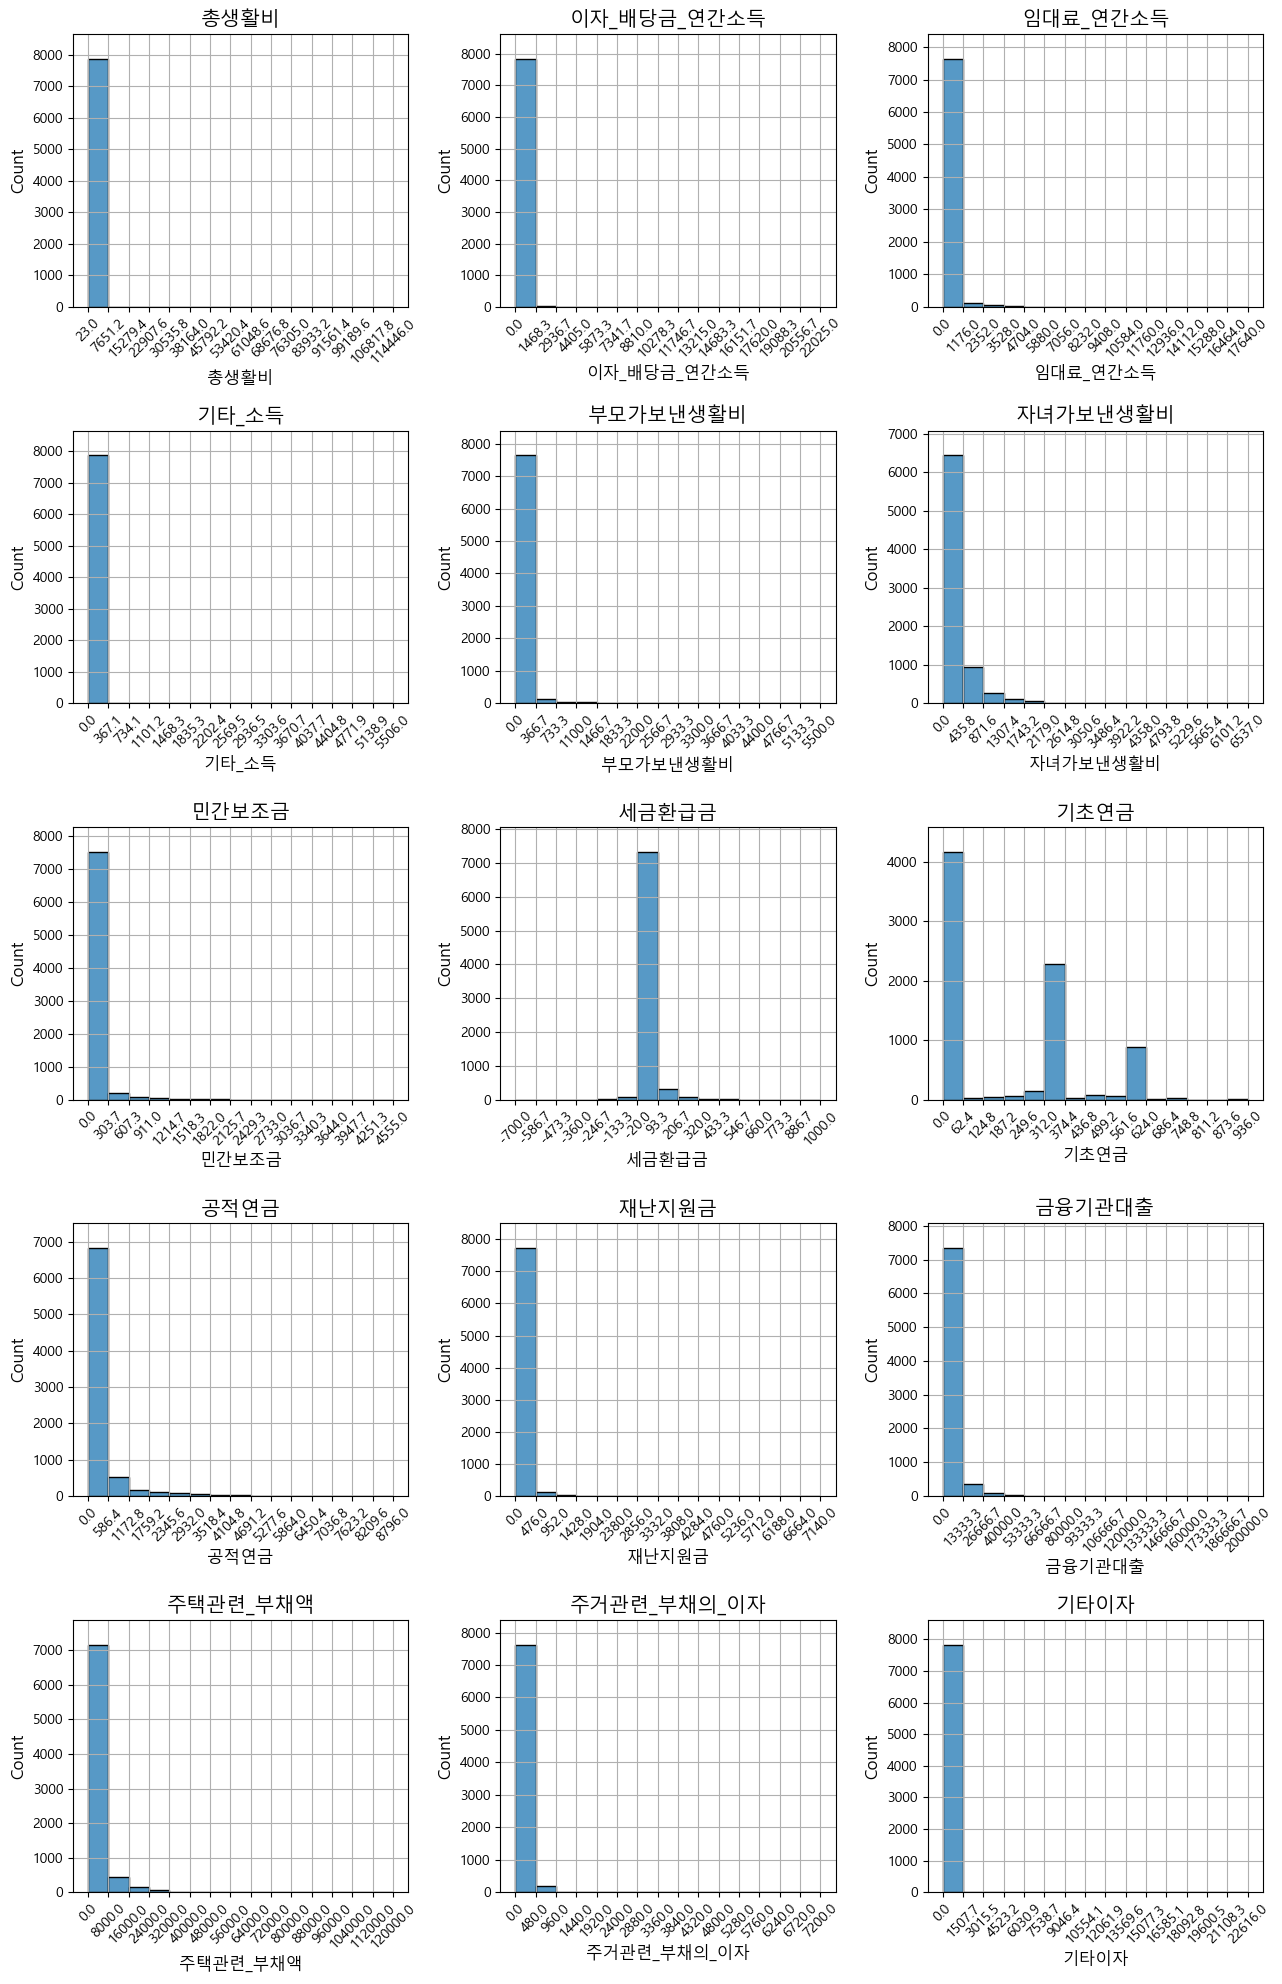

In [89]:
#해당 데이터 도수분포 확인(히스토그햄)
#수집된 자료를 일목요연하게 정리해서 볼 수 있도록 도수분포표를 통해 확인해보고자 한다.

# 히스토그램과 bins를 계산합니다.
num_bins = 15  # 히스토그램 구간 개수
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(13, 20))  # 5x3 서브플롯 생성

for ax, column in zip(axes.flat, re_df1.columns):
    hist, bins = np.histogram(re_df1[column], bins=num_bins)
    bins2 = np.round(bins, 1)

    sb.histplot(data=re_df1, x=column, bins=num_bins, kde=False, ax=ax) #확률밀도곡선 미표시
    ax.set_title(column)  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_xticklabels(bins2, rotation=45, fontsize=10)  # x축 눈금 라벨 설정 (각도 45도), 폰트 사이즈 설정
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 사이즈 설정

    # y축 범위 설정
    y_max = hist.max() + hist.max() * 0.1  # 최대 도수에 10% 여유를 더한 값으로 y축 최댓값 설정
    ax.set_ylim(0, y_max)  # y축 범위 설정
    ax.grid(True) #격자 표시

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

In [90]:
#각 컬럼별 최대값 때문에 도수분포가 비정상적으로 표시되는것으로 보여지는것 같다,

In [91]:
# 각 컬럼 별 이상치 찾기(1)

# 그래프 생성을 위해 컬럼 이름, 길이 확인

re_df1.head()
re_df1.columns
len(re_df1.columns)

15

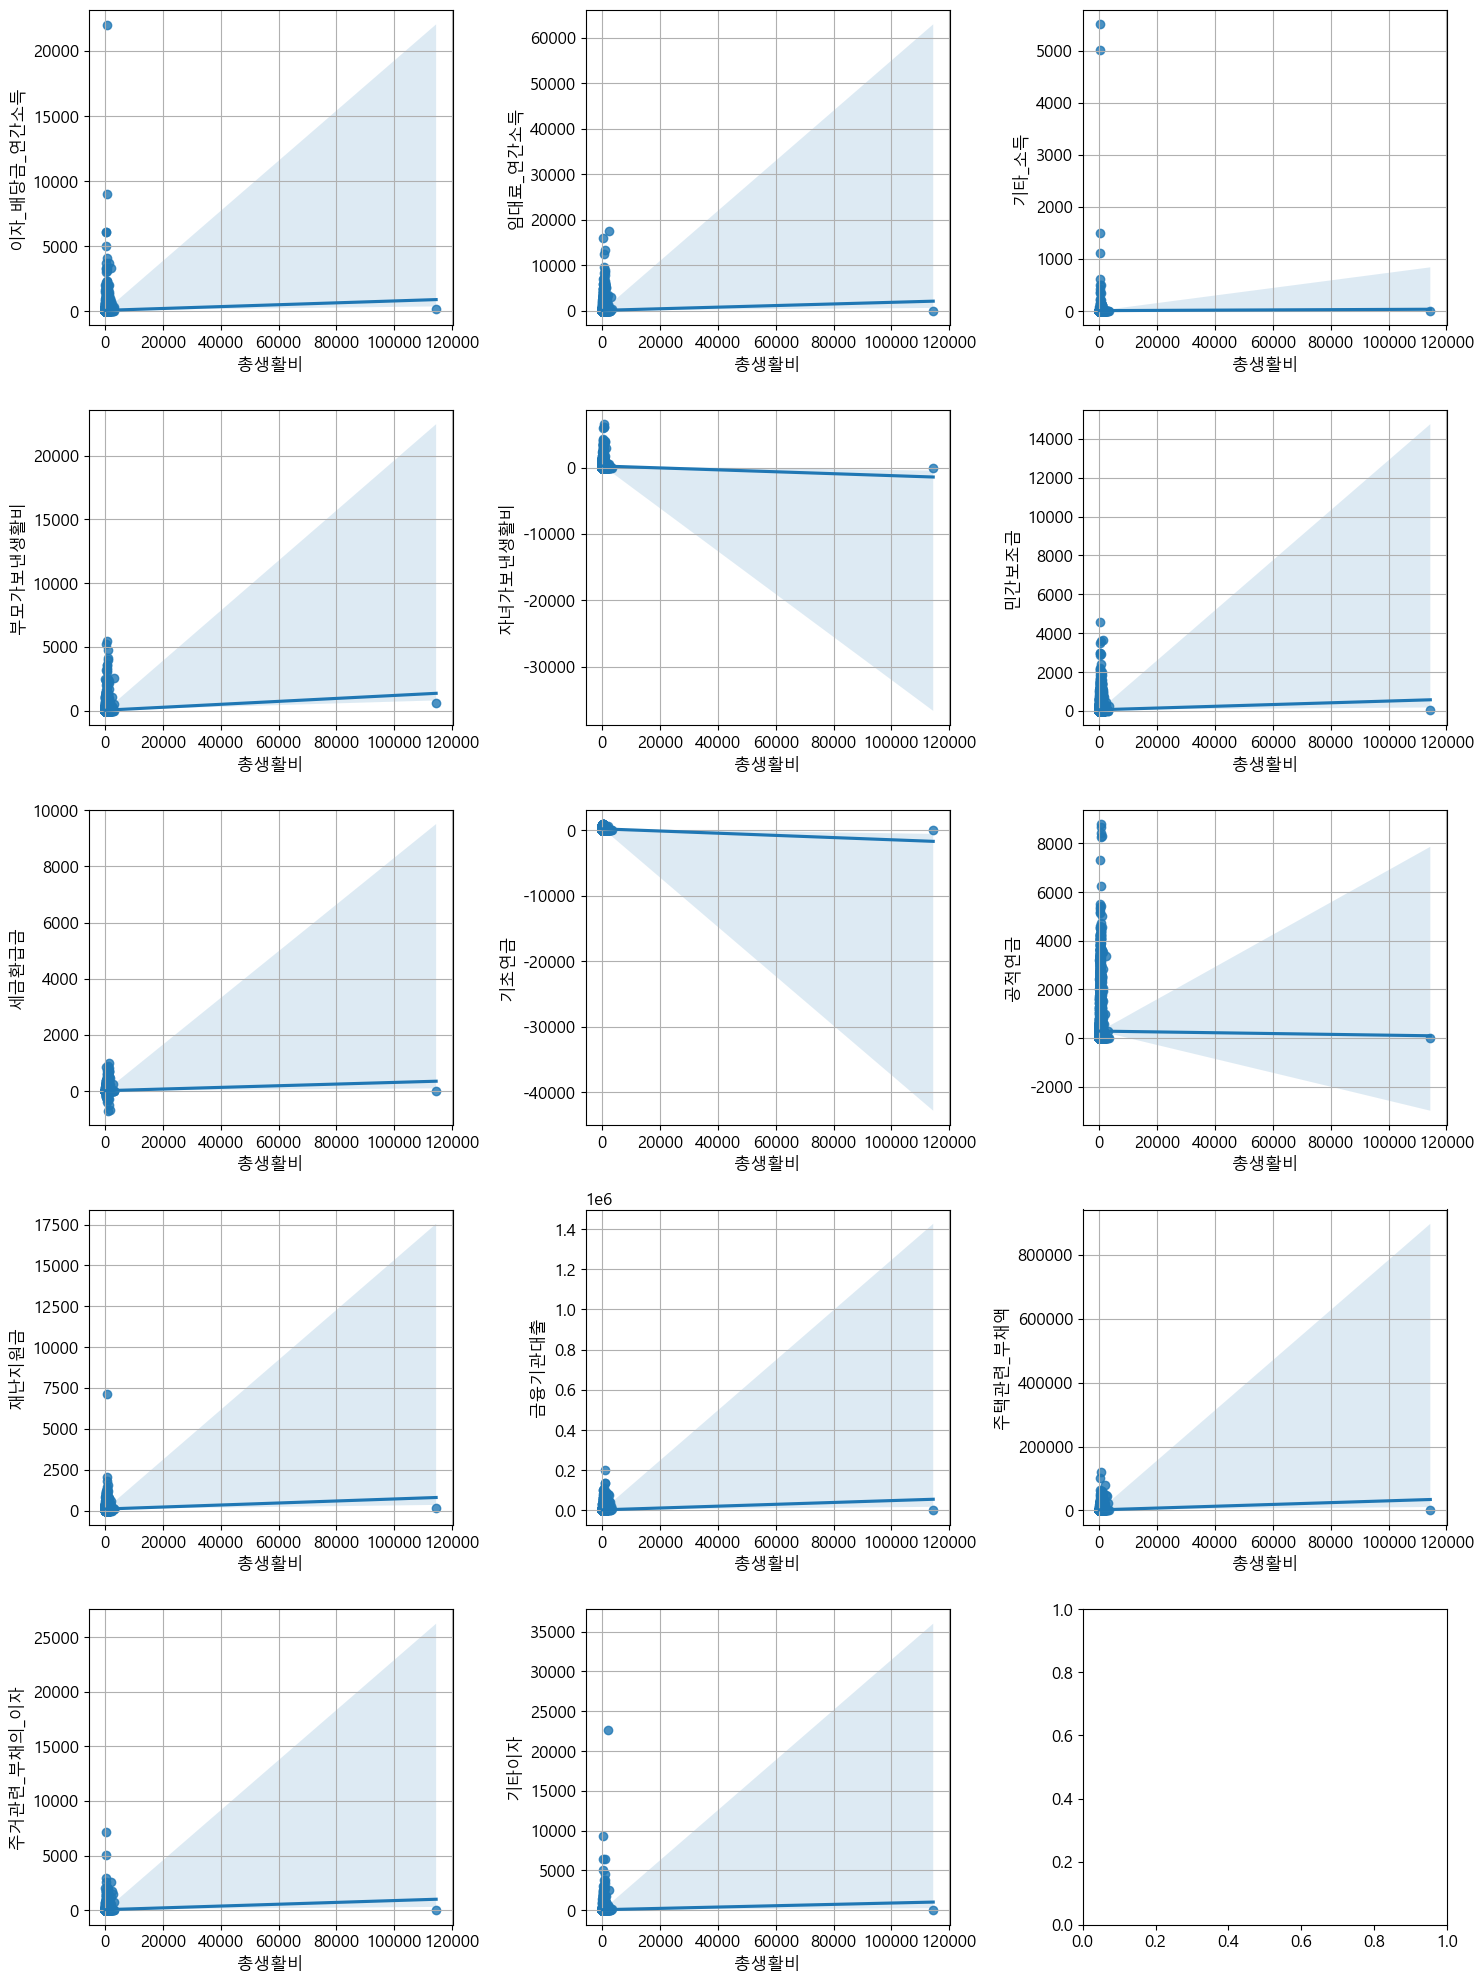

In [92]:
# 보기 쉽게 sub plot 및 for문 이용해서 한번에 조회 (regplot)

# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리려고 시도하기 때문에 1부터 시작
columns = list(re_df1.columns)[1:]

# 3행 5열로 14개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    sb.regplot(data=re_df1, x=dependent_variable, y=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    plt.tight_layout() #그래프 간격 조정
    ax[row, col].grid() #격자표시

plt.show()
plt.close()


In [93]:
# regplot으로 확인시 기초통계량에서 보았던 각 컬럼별 최대값 때문에 정상적인 산점도를 볼 수 없다.
# 특히 종속변수이자 x값인 총생활비에서 최대값에 의해 나머지 값들이 전부 몰려있는 것처럼 표시된다.

In [94]:
# 각 컬럼 별 이상치 찾기(2)

# 보기 쉽게 sub plot 및 for문 이용해서 한번에 조회 (boxplot)

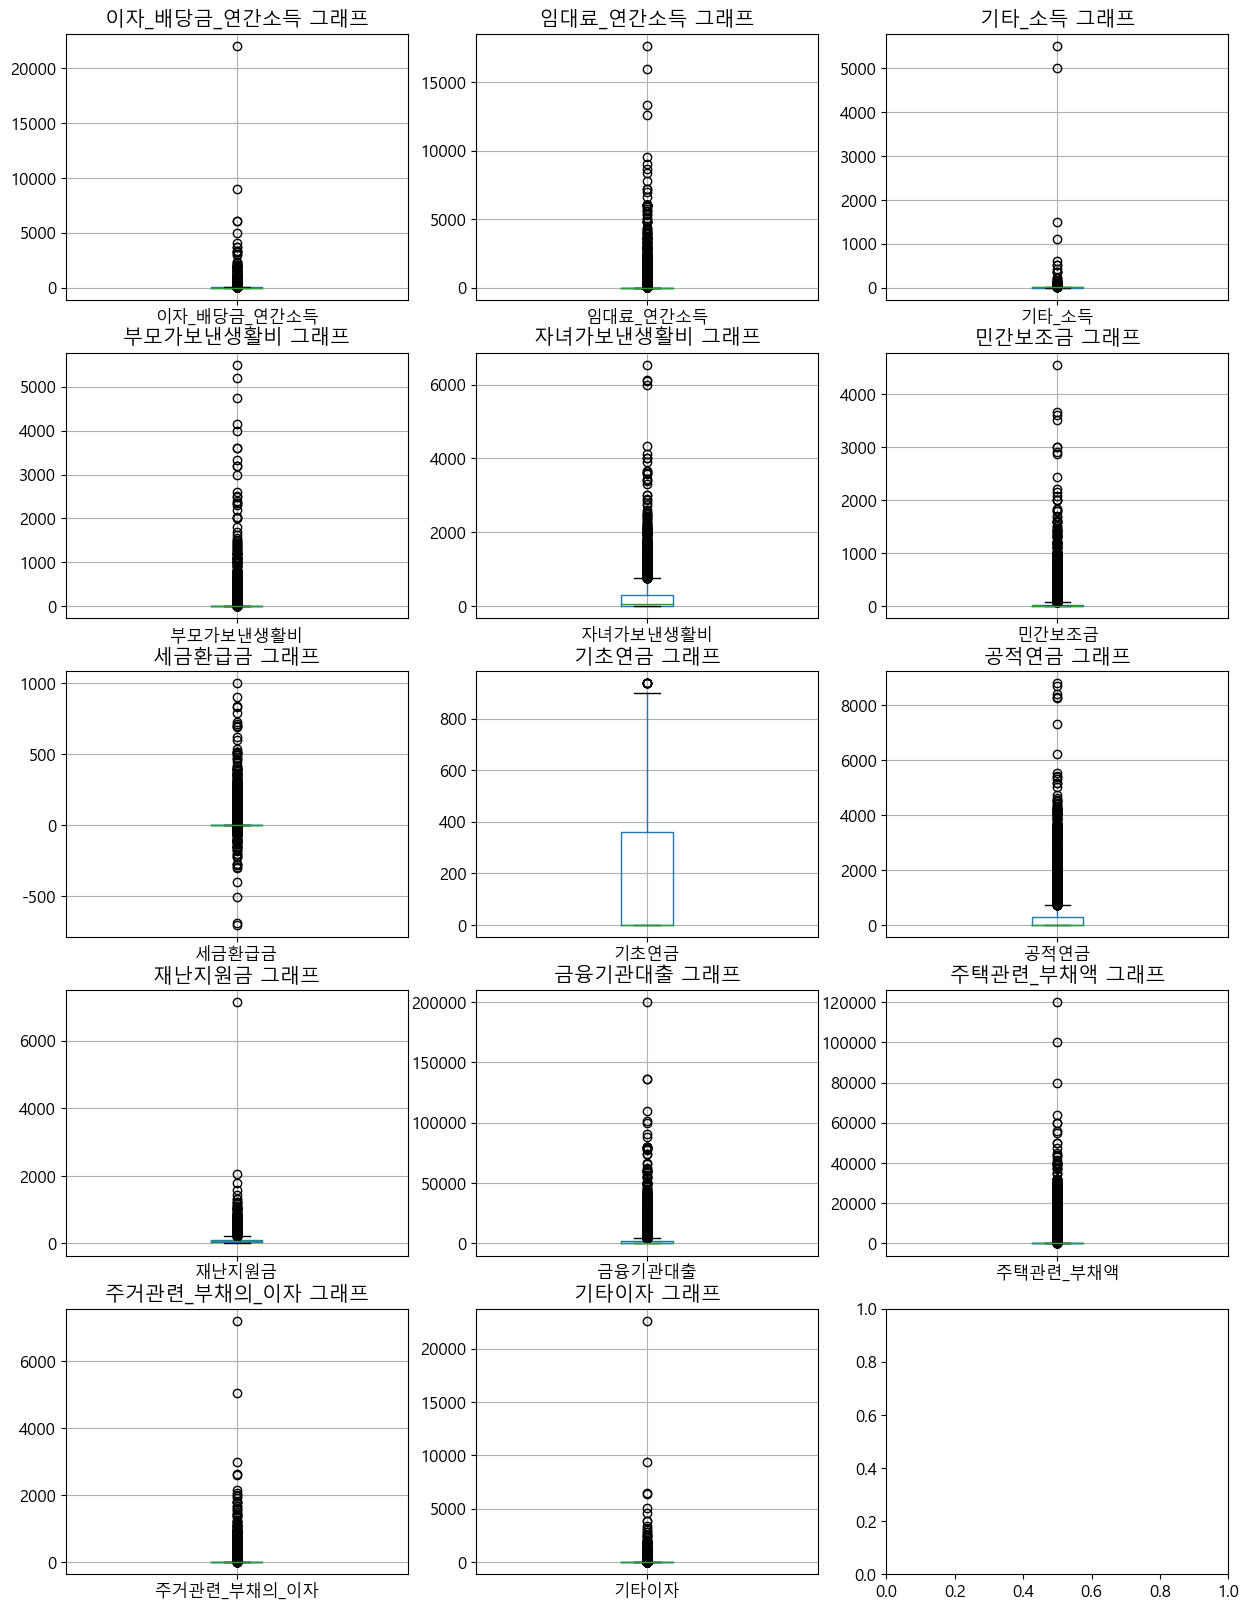

In [95]:
# boxplot으로 각 컬럼별 이상치 확인해보기

# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    re_df1.boxplot(column=c, ax=ax[row, col])
    ax[row, col].set_title(f"{c} 그래프")
    plt.grid()
plt.show()

In [96]:
# regplot, boxplot 조회 결과

# 1) x값으로 넣을 종속변수(총생활비)에서 1건만 비정상적으로 높은 수치가 확인되어 제거하고 진행

# 2) y값으로 넣을 독립변수들 중 이상치가 각 컬럼에서 발견되어 프로젝트 팀원들 주관적 판단에 의해 제거하기로 결정

# 3) 이자_배당금_연간소득 상위이상치 1건, 임대료_연간소득 상위이상치 4건,기타_소득 상위이상치 4건,
#    주택관련_부채액 상위이상치 3건, 공적연금_연간소득 상위이상치 7건
#    세금환급금 상위이상치 8건, 금융기관대출 상위이상치 2건, 주거관련_부채의_이자 상위이상치 4건

# 4) 종속변수,독립변수 포함해서 총35건의 데이터 제거하였음

In [97]:
# # 이상치 행 제외하고 재조회
# df2=re_df1.query('(총생활비 < 10000) and (이자_배당금_연간소득 < 20000) and (임대료_연간소득 < 10000) and \
#                  (기타_소득 < 4000) and (부모가보낸생활비 < 3500) and (자녀가보낸생활비 < 5500) and (민간보조금 < 4000) and \
#                  (세금환급금 > -500 and 세금환급금 < 700 ) and (금융기관대출 < 125000) and (주택관련_부채액 < 75000) and \
#                  (주거관련_부채의_이자 < 2500) and (기타이자 < 5000) and (재난지원금 < 7000)')
# df2

In [98]:
#이상치 행 제외하고 재조회 (진석님 버전)
df2=re_df1.query('(총생활비 < 100000) and (이자_배당금_연간소득 < 20000) and (기타_소득 < 4900) and \
                (금융기관대출 < 190000) and (재난지원금 < 7000)') 

In [99]:
# 가구 수가 7830건으로 변경 된것을 알 수 있다.

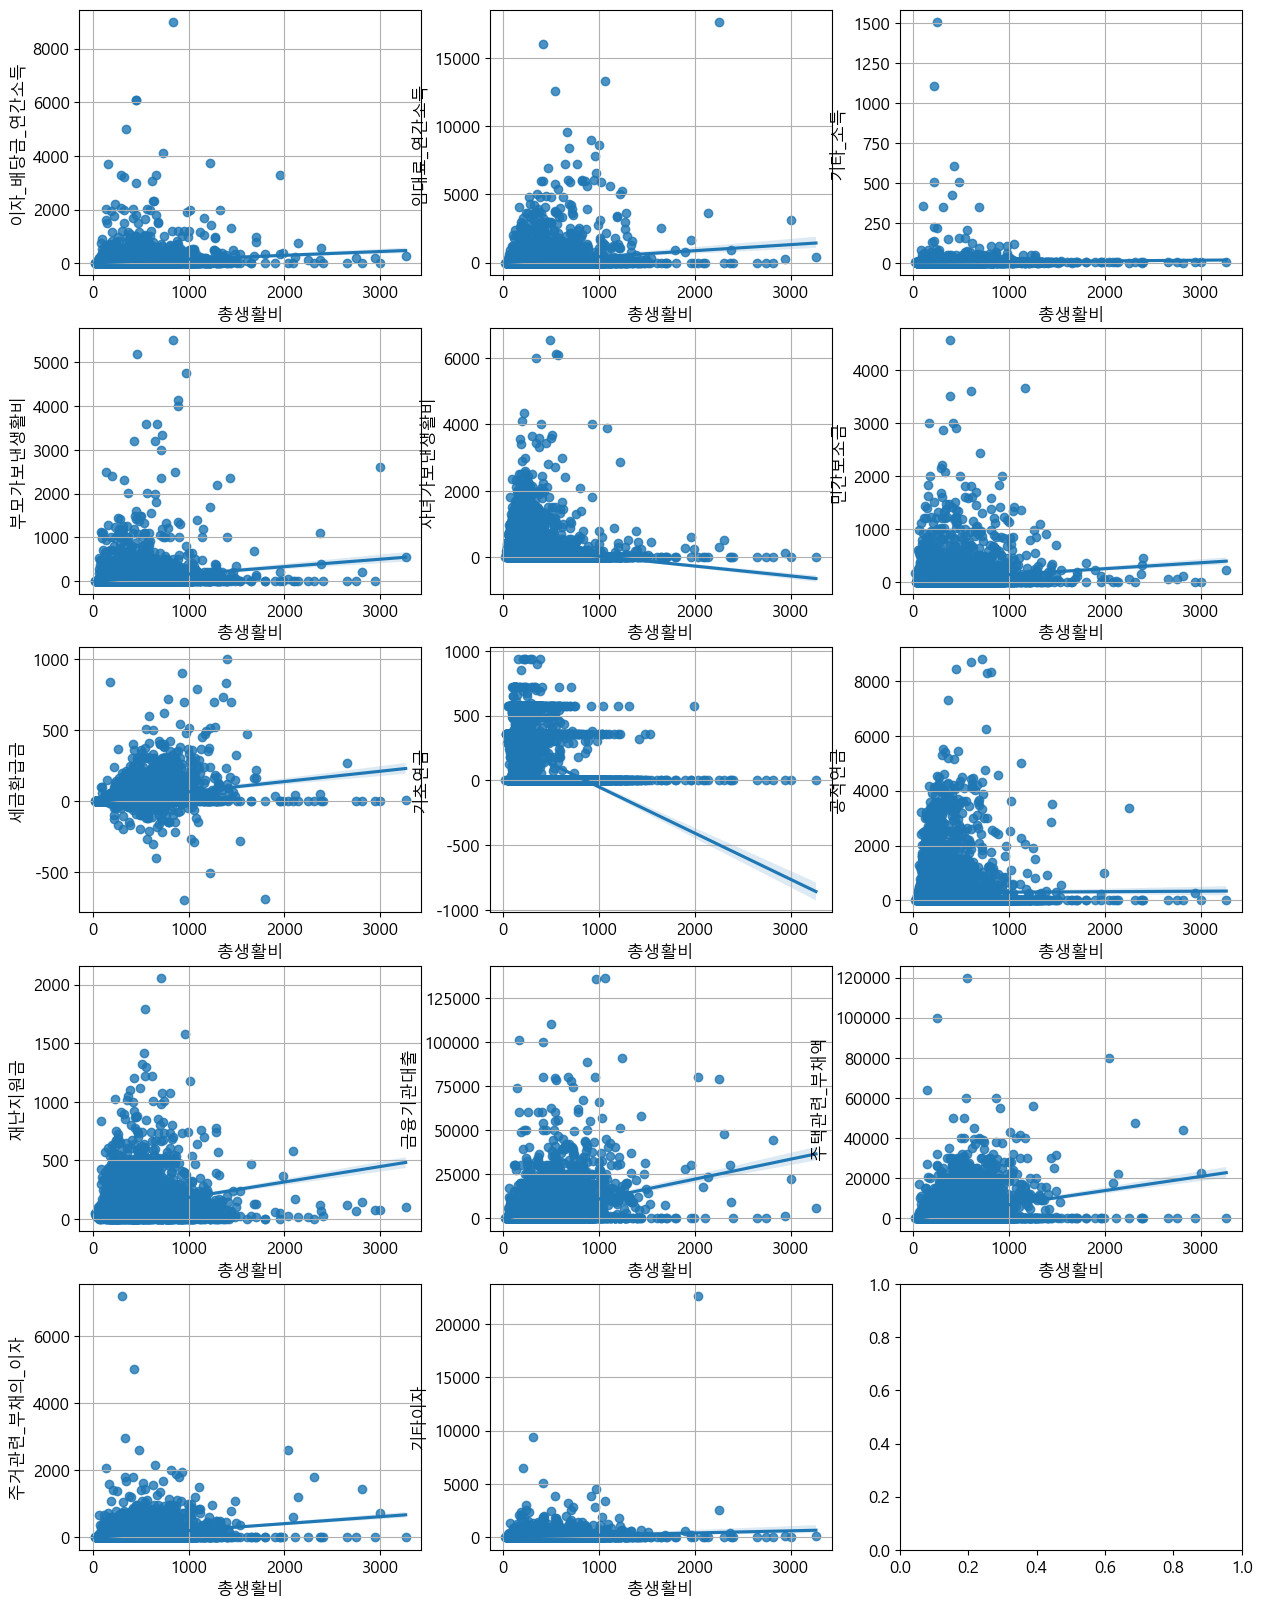

In [100]:
# 이상치 데이터 제거후 추세선이 올라오는지 regplot으로 그래프 재확인하기, boxplot은 재실행해도
# 이상치가 계속 표시될 것이기 때문에 굳이 실행하지 않기로 함

# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리려고 시도함
columns = list(df2.columns)[1:]

# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    sb.regplot(data=df2, x=dependent_variable, y=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    ax[row, col].grid()

plt.show()
plt.close()

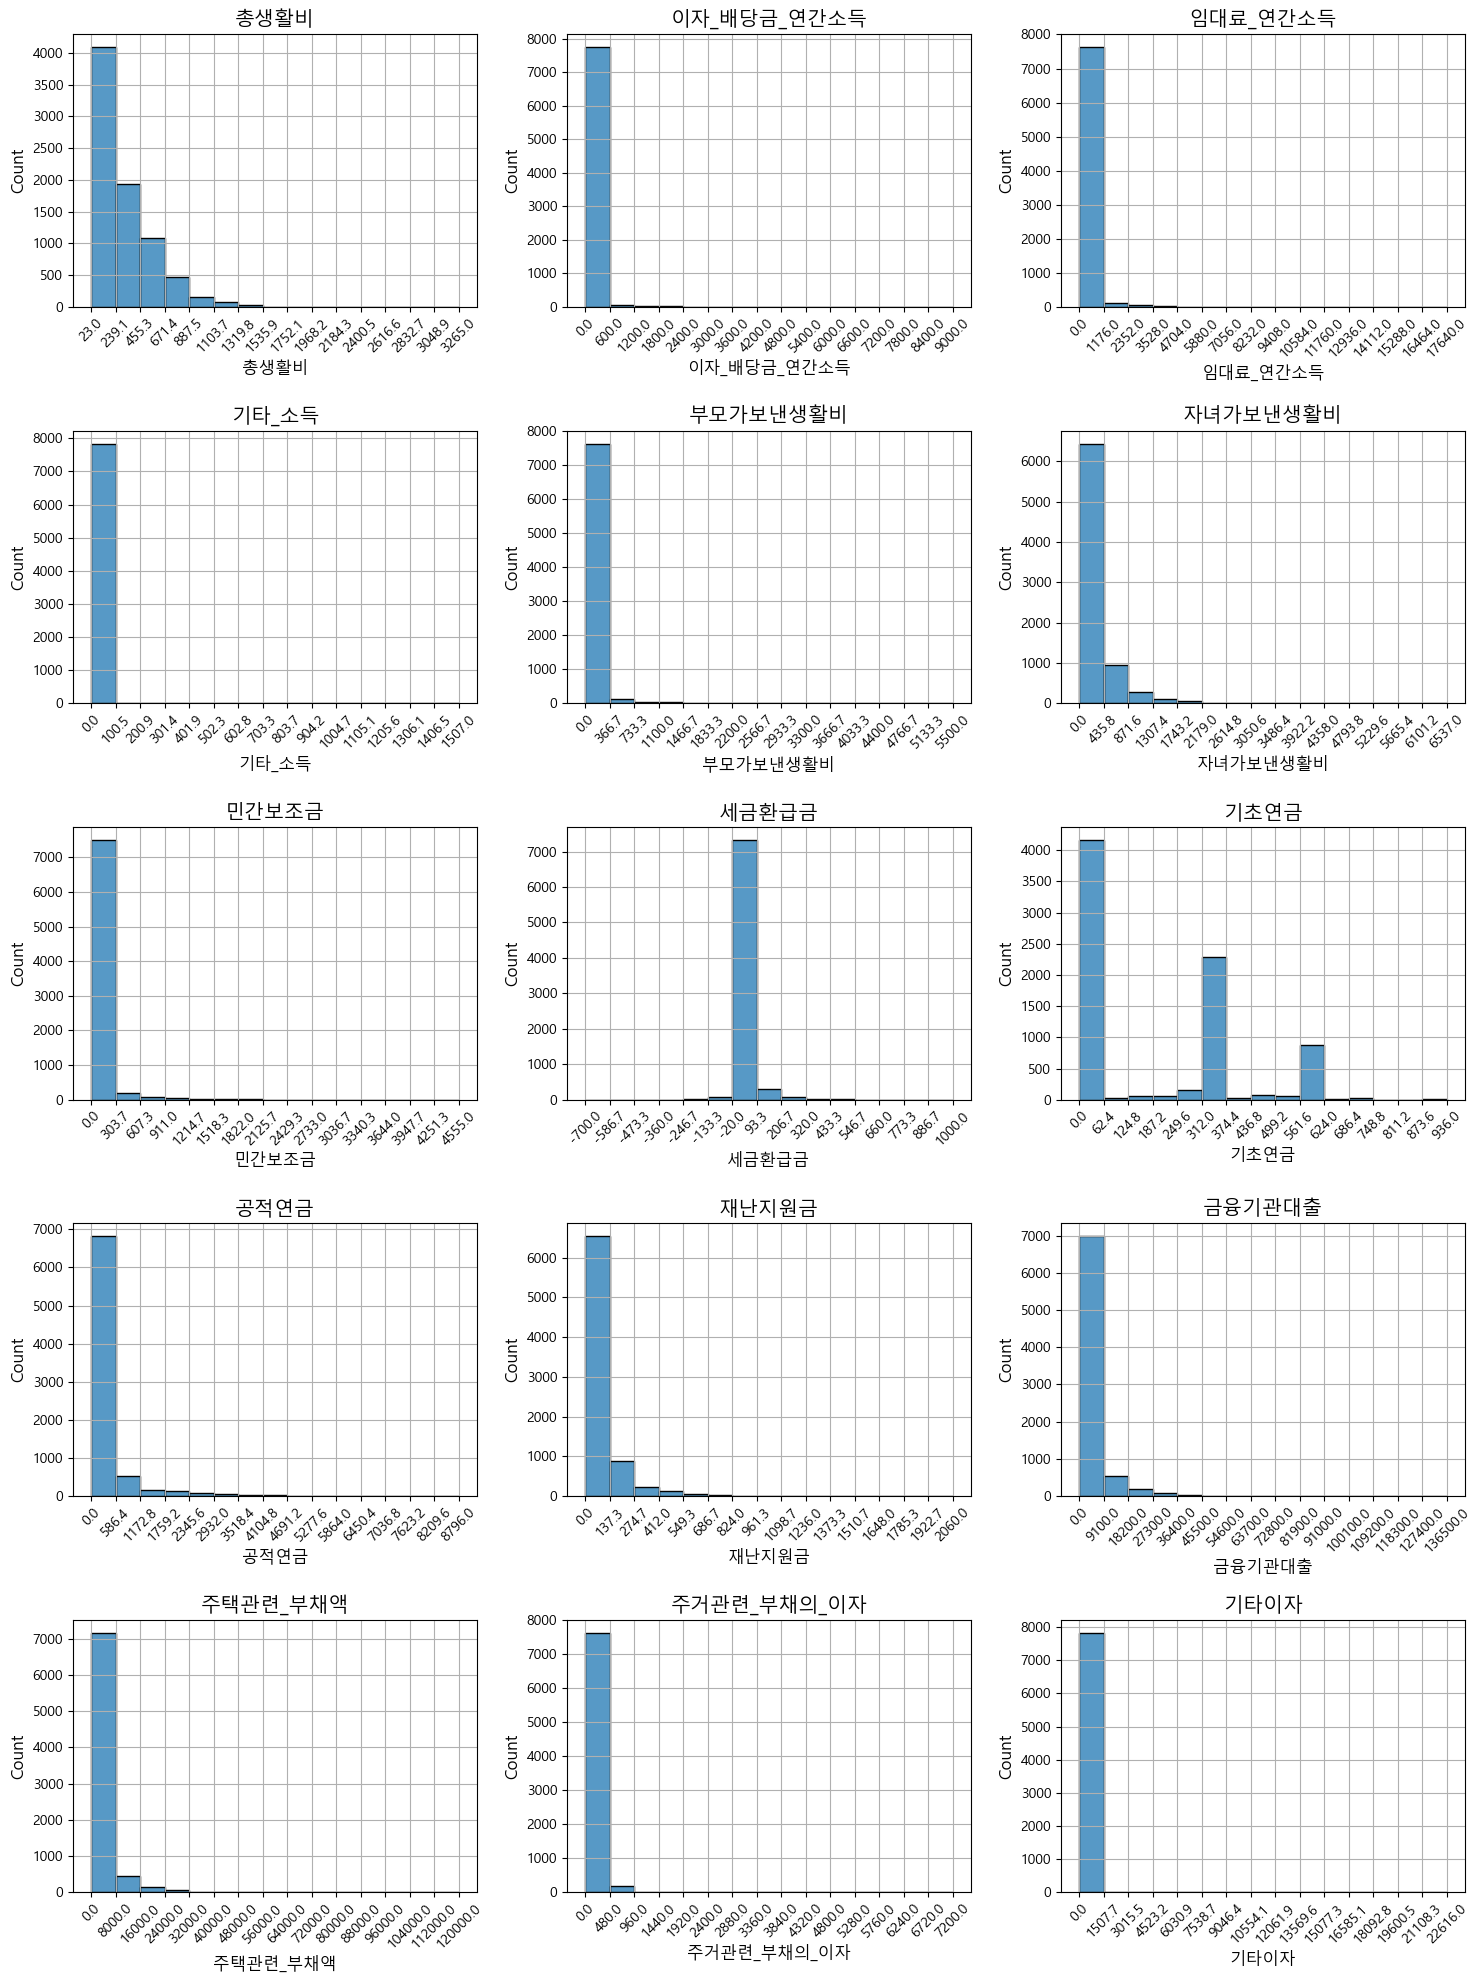

In [101]:
#데이터 분포가 이전보다 나아졌는지 히스토그램 그래프로 재확인

num_bins = 15  # 히스토그램 구간 개수
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))  # 3x3 서브플롯 생성

for ax, column in zip(axes.flat, df2.columns):
    hist, bins = np.histogram(df2[column], bins=num_bins)
    bins2 = np.round(bins, 1)

    sb.histplot(data=df2, x=column, bins=num_bins, kde=False, ax=ax)
    ax.set_title(column)  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_xticklabels(bins2, rotation=45, fontsize=10)  # x축 눈금 라벨 설정 (각도 45도)
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 사이즈 설정
    ax.grid(True)

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

In [102]:
#이전보다 분포도가 조금 나아진것을 확인 할 수 있다.

In [103]:
#신뢰구간 구하기

# 모집단: 대한민국 전체 가구 
# 모수: 대한민국 전체 가구 당 해당 엑셀파일의 종속,독립 변수들 수치
# 표본: 모집단의 일부(ex: 대한민국 전체가구 중 7830가구 선발)
# 통계량: 표본 7830가구의 월 평균 총생활비

# 설명
# 해당 데이터의 신뢰구간을 구함으로서 대한민국 전체 가구 모수들(종속변수,독립변수)의
# 추정값 범위를 추측하는 데에 의미가 있다고 볼 수 있다.

df2Col = list(df2.columns)
# df2Col
for cc in df2Col:
    print("%s 신뢰구간95%%"%cc)
    getConfidenceInterval(df2["%s"%cc])
    # print('\n')

총생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    309.149 |
| 상한 |    321.099 |
+------+------------+
이자_배당금_연간소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |     47.332 |
| 상한 |    58.1386 |
+------+------------+
임대료_연간소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |     114.97 |
| 상한 |    143.471 |
+------+------------+
기타_소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    6.53954 |
| 상한 |    7.70112 |
+------+------------+
부모가보낸생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    41.0606 |
| 상한 |    50.7401 |
+------+------------+
자녀가보낸생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    221.624 |
| 상한 |    239.844 |
+------+------------+
민간보조금 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    53.7174 |
| 상한 |    62.6844 |
+------+------------+
세금환급금 신뢰구간95%
+-----

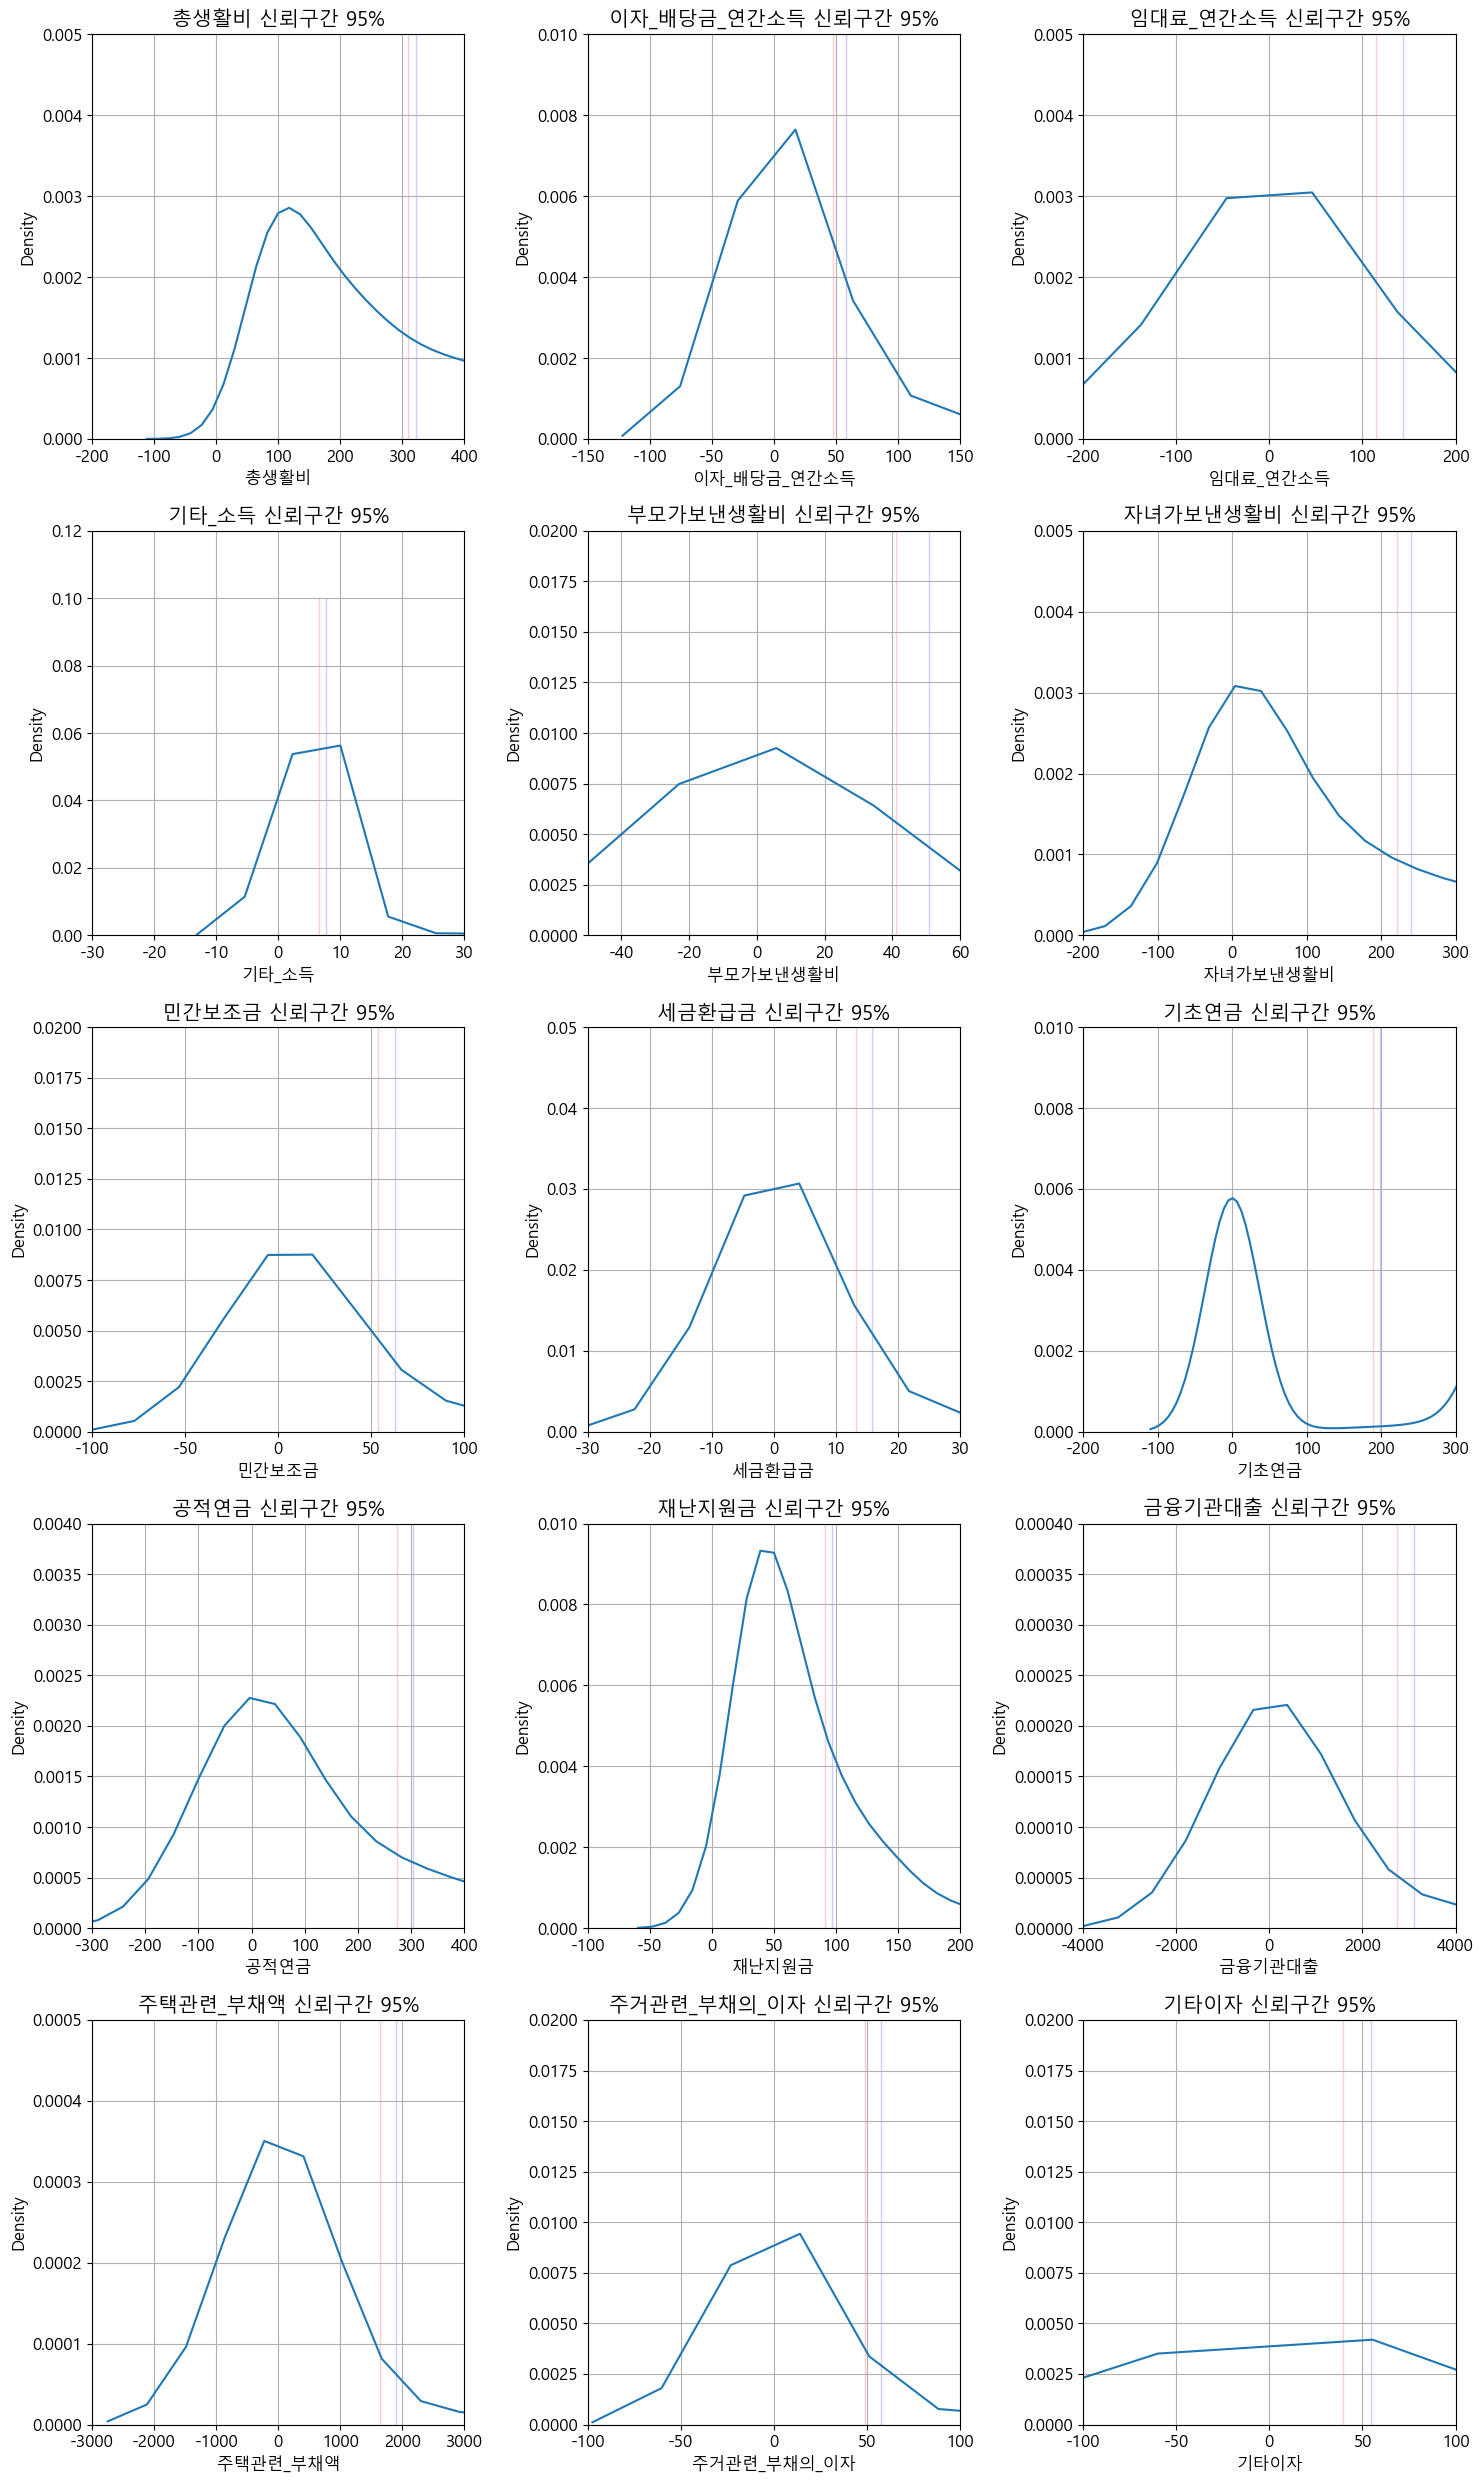

In [104]:
#신뢰구간을 그래프로 시각화 해보기


# 변수명 리스트 생성
variables = df2.columns

# 각 변수별 x, y 범위 정의
x_ranges = {
    '총생활비': (-200,400),
    '이자_배당금_연간소득': (-150,150),
    '임대료_연간소득': (-200,200),
    '기타_소득': (-30,30),
    '부모가보낸생활비':(-50, 60),
    '자녀가보낸생활비':(-200, 300),
    '민간보조금':(-100, 100),
    '세금환급금': (-30,30),
    '기초연금':(-200, 300),
    '공적연금': (-300,400),
    '재난지원금': (-100, 200),
    '금융기관대출': (-4000,4000),
    '주택관련_부채액': (-3000,3000),
    '주거관련_부채의_이자': (-100,100),
    '기타이자': (-100, 100)
}

y_ranges = {
    '총생활비': (0,0.005),
    '이자_배당금_연간소득': (0,0.01),
    '임대료_연간소득': (0,0.005),
    '기타_소득': (0,0.12),
    '부모가보낸생활비': (0, 0.02),
    '자녀가보낸생활비': (0, 0.005),
    '민간보조금': (0, 0.02),
    '세금환급금': (0,0.05),
    '기초연금': (0, 0.01),
    '공적연금': (0, 0.004),
    '재난지원금': (0, 0.01),
    '금융기관대출': (0,0.0004),
    '주택관련_부채액': (0,0.0005),
    '주거관련_부채의_이자': (0,0.02),
    '기타이자': (0, 0.02)
}

# 신뢰구간 계산
confidence_level = 0.95
confidence_intervals = {}  # 각 변수별 신뢰구간을 저장할 딕셔너리

for var in variables:
    sample = df2[var]
    n = len(sample)
    sample_mean = sample.mean()
    sample_std = sample.std(ddof=1)
    std_error = sample_std / sqrt(n)
    
    t_value = t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_value * std_error
    
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    confidence_intervals[var] = (lower_bound, upper_bound)

# subplot 설정
num_rows = (len(variables) + 2) // 3  # 3열로 subplot 배치
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# 신뢰구간 시각화
for ax, var in zip(axes.flat, variables):
    cmin, cmax = confidence_intervals[var]  # 하한과 상한
    
    sb.kdeplot(data=df2, x=var, ax=ax)
    sb.lineplot(x=[cmin, cmin], y=[0, 0.1], color='red', ax=ax)
    sb.lineplot(x=[cmax, cmax], y=[0, 0.1], color='blue', ax=ax)
    ax.set_title(f'{var} 신뢰구간 95%')
    ax.set_xlim(x_ranges[var])  # x축 범위 확장
    ax.set_ylim(y_ranges[var])  # y축 범위 설정
    ax.grid(True)  # 격자 표시

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

In [105]:
cnames = []
dtypes = df2.dtypes

for i, v in enumerate(dtypes):
    if v != 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

총생활비 int64
이자_배당금_연간소득 float64
임대료_연간소득 int64
기타_소득 float64
부모가보낸생활비 float64
자녀가보낸생활비 int64
민간보조금 float64
세금환급금 float64
기초연금 int64
공적연금 int64
재난지원금 int64
금융기관대출 int64
주택관련_부채액 float64
주거관련_부채의_이자 int64
기타이자 float64
['총생활비', '이자_배당금_연간소득', '임대료_연간소득', '기타_소득', '부모가보낸생활비', '자녀가보낸생활비', '민간보조금', '세금환급금', '기초연금', '공적연금', '재난지원금', '금융기관대출', '주택관련_부채액', '주거관련_부채의_이자', '기타이자']


In [106]:
#산점도 행렬 그래프로 각 요인(변수)들간에 상관관계가 있는지 확인

# plt.figure(figsize=(30, 20))
# sb.pairplot(data=df2, vars=cnames, kind='reg')
# plt.show()
# plt.close()

In [107]:
#확인 결과 시간도 오래 걸리고 그래프가 작아 보기가 힘들다

정규분포 가정 구하기(1)

왜도

 분포의 비대칭도.

| 구분 | 내용 |
|---|---|
| 정규분포 | $왜도=0$ |
| 왼쪽으로 치우침 | $왜도 > 0$ |
| 오른쪽으로 치우침 | $왜도 < 0$ |

In [108]:
# 왜도 구하기, 종속변수인 총생활비는 제외
# 왜냐하면 종속변수는 분석의 대상이 되는 특별한 변수이며, 종속변수의 분포 특성을
# 파악하는 것은 회귀 분석 등과 같은 다른 분석 기법으로 처리될 수 있기 때문
for column in df2.columns:
    if column != '총생활비':  # '총생활비' 컬럼은 제외
        skewness = skew(df2[column])
        print(f"{column}의 정규분포 왜도: {skewness}")
        print("================================")

이자_배당금_연간소득의 정규분포 왜도: 16.080449460125415
임대료_연간소득의 정규분포 왜도: 11.47044870450191
기타_소득의 정규분포 왜도: 38.12701175089699
부모가보낸생활비의 정규분포 왜도: 12.077294980497813
자녀가보낸생활비의 정규분포 왜도: 4.408258315737607
민간보조금의 정규분포 왜도: 8.621273288490787
세금환급금의 정규분포 왜도: 5.110188716343239
기초연금의 정규분포 왜도: 0.5168303267042244
공적연금의 정규분포 왜도: 4.466745209684911
재난지원금의 정규분포 왜도: 4.887237494383409
금융기관대출의 정규분포 왜도: 5.733174499068333
주택관련_부채액의 정규분포 왜도: 5.940795808023158
주거관련_부채의_이자의 정규분포 왜도: 12.301821008913048
기타이자의 정규분포 왜도: 38.96324366248297


In [109]:
# 설명
# 결과에서 나온 값들 확인 결과 기초연금을 제외한 나머지 독립변수 분포는 정규분포를 따르지 않음을 알 수 있다.
# 각 변수의 왜도값이 0보다 크다는 의미는 왼쪽으로 치우져저 있다는 것을 의미함.
# 다만 기초통계량을 보면 알 수 있듯이 각 변수별 수치값의 편차가 워낙 크고 최소값이 "0"인 경우가 많음
# 또한 해당 데이터는 국민들을 대상으로 한 실제 기반 데이터이기 때문에 정규분포를 따르지 않을 수 있음을 염두해야 할 것으로 판단됨.

정규분포 가정 구하기(2)

잔차의 첨도

 확률분포의 뾰족한 정도.

Fisher = True 

   - 첨도 기준이 Fisher (normal ==> 0.0) 이다.
   - 정규분포의 첨도 = 0이다. 


| 구분 | 내용 |
|---|---|
| 정규분포 | $첨도 = 0$ |
| 위로 뾰족함 | $첨도 > 0$ |
| 아래로 뾰족함 | $첨도 < 0$ |

In [110]:
#첨도 구하기.종속변수인 총생활비는 제외
#이유는 상기 왜도와 같음

for column in df2.columns:
    if column != '총생활비':  # '총생활비' 컬럼은 제외
        kurtosisness = kurtosis(df2[column],fisher=True)
        print(f"{column}의 정규분포 첨도: {kurtosisness}")
        print("================================")

이자_배당금_연간소득의 정규분포 첨도: 398.1721219421601
임대료_연간소득의 정규분포 첨도: 199.7155906338931
기타_소득의 정규분포 첨도: 1832.706639996759
부모가보낸생활비의 정규분포 첨도: 204.78634328033834
자녀가보낸생활비의 정규분포 첨도: 36.13413636685615
민간보조금의 정규분포 첨도: 110.50703700782358
세금환급금의 정규분포 첨도: 60.73643503734408
기초연금의 정규분포 첨도: -1.189204204247725
공적연금의 정규분포 첨도: 28.36051890924092
재난지원금의 정규분포 첨도: 38.836295064673806
금융기관대출의 정규분포 첨도: 52.46306833278263
주택관련_부채액의 정규분포 첨도: 64.29538364890819
주거관련_부채의_이자의 정규분포 첨도: 313.1538389780422
기타이자의 정규분포 첨도: 2256.0601988166322


In [111]:
# 설명
# 결과에서 나온 값들 확인 결과 기초연금을 제외한 나머지 독립변수 분포는 정규분포를 따르지 않음을 알 수 있다.
# 각 변수의 첨도값이 0보다 크다는 의미는 위쪽으로 뾰족하다는 것을 의미함.
# 다만 기초통계량을 보면 알 수 있듯이 각 변수별 수치값의 편차가 워낙 크고 최소값이 "0"인 경우가 많음
# 또한 해당 데이터는 국민들을 대상으로 한 실제 기반 데이터이기 때문에 정규분포를 따르지 않을 수 있음을 염두해야 할 것으로 판단됨.

In [112]:
#왜도,첨도 결사 결과 변수 하나를 제외한 나머지는 전부 정규분포를 따르지 않는것으로 확인되었다.
#비선형적 관계,정규분포를 따르지 않기 때문에 상관관계를 확인하기 위해 스피어만 상관분석을 이용
#히트맵 그래프로 요인들간에 상관관계 있는지 확인
corr = df2.corr(method='spearman')
corr.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
총생활비,1.000000,0.214765,0.134331,0.357970,0.417954,-0.425303,0.180332,0.399122,-0.532779,-0.072401,0.529540,0.464178,0.385293,0.400113,0.294924
이자_배당금_연간소득,0.214765,1.000000,0.175856,0.131413,-0.019327,0.083273,0.103612,0.055806,-0.098978,0.224988,0.039586,-0.087080,-0.087792,-0.086860,-0.060146
임대료_연간소득,0.134331,0.175856,1.000000,0.099732,-0.055630,0.083901,-0.002538,-0.006265,-0.053979,0.143308,0.007447,-0.004101,-0.046395,-0.038910,0.041747
기타_소득,0.357970,0.131413,0.099732,1.000000,0.120537,-0.118122,0.131055,0.158226,-0.116063,-0.014850,0.295934,0.185600,0.147344,0.156689,0.141256
부모가보낸생활비,0.417954,-0.019327,-0.055630,0.120537,1.000000,-0.467324,0.110270,0.339603,-0.411025,-0.327178,0.229047,0.339845,0.342056,0.343380,0.160743


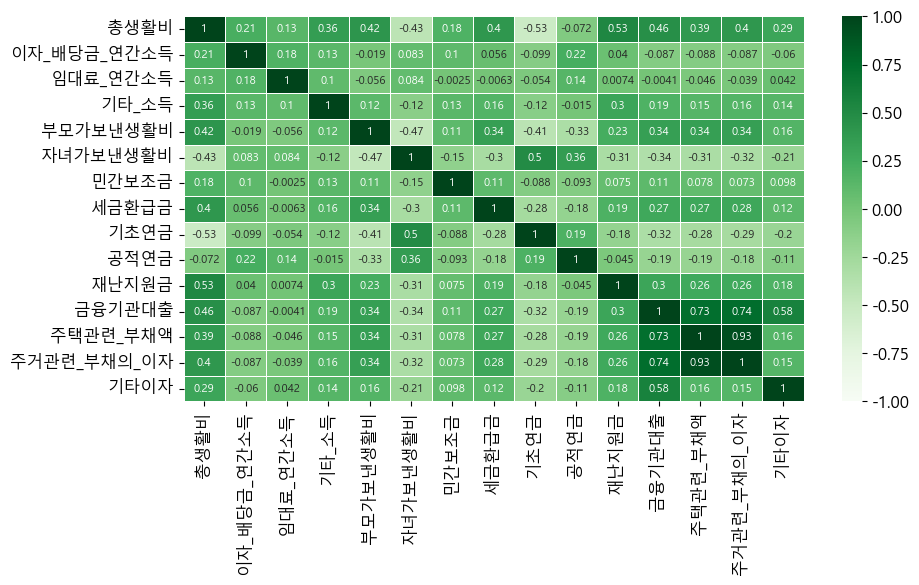

In [113]:
plt.rcParams["figure.figsize"] = (10,5)

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상(Greys,Purples,Blues,Greens,Oranges,Reds,OrRd,PuRd,RdPu,BuPu,GnBu,PuBu,YlGnBu,PuBuGn,BuGn,YlGn)
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5, #구분선 굵기
           annot_kws={"size": 8}  # 글자 크기 조정
)

plt.show()
plt.close()

In [114]:
#해당 그래프로 알 수 있는 사실
# 1)일부 독립변수간에 상관관계가 있는 것을 알 수 있다.
# 2)전체적으로 양의 상관관계를 띄고 있으나 몇 가지 확인 할 수 있는게 보인다.
# 3)총생활비-기초연금간에는 음의 상관관계를 가지고 있는 것을 알 수 있다. 이는 기초연금 액수가 증가 할수록 총생활비가 낮아진다는 것을 의미한다.
# 4)금융기관대출-주택관련부채액-주거관련부채의이자 간에 상관관계가 있음을 알 수 있다. 다만 이 부분은
#   대출액이 커질수록 이자도 당연히 커지기 때문에 합리적이라고 볼 수 있다.


In [115]:
#회귀분석에 필요한 요인들을 선정하기 위해 먼저 데이터 표준화 진행

x_train_std_df, y_train_std_df = scalling(df2[cnames], '총생활비')
x_train_std_df

,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,-0.215825,-0.200522,-0.004582,-0.209725,0.653613,1.488536,-0.242354,-0.880946,-0.427626,-0.580214,0.888392,-0.320955,-0.272759,0.861872
1,-0.215825,-0.200522,-0.004582,-0.209725,0.362327,-0.237737,-0.242354,0.757655,-0.427626,-0.622254,-0.367689,-0.320955,-0.272759,-0.133894
2,-0.215825,-0.076379,-0.004582,-0.209725,-0.560079,1.118621,-0.242354,0.757655,0.372241,-0.622254,1.390825,3.401969,3.415518,-0.133894
3,0.357141,-0.200522,0.071568,-0.209725,-0.560079,-0.188415,-0.242354,1.740816,-0.427626,0.260578,-0.367689,-0.320955,-0.272759,-0.133894
4,-0.011194,-0.200522,-0.004582,-0.209725,0.459423,-0.272263,-0.242354,0.757655,-0.427626,-0.496135,-0.367689,-0.320955,-0.272759,-0.133894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7854,-0.215825,-0.200522,-0.233032,0.018732,-0.560079,-0.287059,0.927333,-0.880946,-0.427626,0.050380,0.009135,0.223863,0.219011,-0.133894
7855,-0.215825,0.823652,-0.233032,-0.026959,-0.560079,-0.287059,1.261529,-0.880946,-0.427626,0.050380,4.656635,-0.320955,-0.272759,4.304376
7856,-0.215825,6.006591,-0.233032,-0.026959,-0.560079,-0.287059,-0.242354,-0.880946,-0.427626,0.218539,2.891465,4.391177,0.070455,-0.133894
7857,-0.052121,-0.200522,-0.271107,-0.209725,-0.560079,-0.287059,-0.242354,-0.880946,-0.427626,-0.538174,1.139608,1.858317,1.571379,-0.133894


In [116]:
#표준화 된 데이터를 토대로pca분석 진행

model = pca()
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,금융기관대출,0.491171,best
1,PC2,자녀가보낸생활비,0.497598,best
2,PC3,공적연금,0.567770,best
3,PC4,기타_소득,0.758736,best
4,PC5,세금환급금,-0.454537,best
5,PC6,민간보조금,-0.635869,best
6,PC7,재난지원금,-0.509041,best
7,PC8,공적연금,-0.540182,best
8,PC9,부모가보낸생활비,0.771742,best
9,PC10,이자_배당금_연간소득,0.454611,best


In [117]:
#주성분 선정

best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
best_names


['금융기관대출',
 '기초연금',
 '공적연금',
 '자녀가보낸생활비',
 '민간보조금',
 '기타_소득',
 '부모가보낸생활비',
 '이자_배당금_연간소득',
 '기타이자',
 '세금환급금',
 '재난지원금']

In [118]:
#타켓네임이라는 변수에 pca분석에서 나온 best값+종속변수를 합침
target_names = best_names + ['총생활비']
target_names

['금융기관대출',
 '기초연금',
 '공적연금',
 '자녀가보낸생활비',
 '민간보조금',
 '기타_소득',
 '부모가보낸생활비',
 '이자_배당금_연간소득',
 '기타이자',
 '세금환급금',
 '재난지원금',
 '총생활비']

In [119]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df3 = merge_df.filter(target_names)
df3

,금융기관대출,기초연금,공적연금,자녀가보낸생활비,민간보조금,기타_소득,부모가보낸생활비,이자_배당금_연간소득,기타이자,세금환급금,재난지원금,총생활비
0,0.888392,-0.880946,-0.427626,0.653613,1.488536,-0.004582,-0.209725,-0.215825,0.861872,-0.242354,-0.580214,-0.148503
1,-0.367689,0.757655,-0.427626,0.362327,-0.237737,-0.004582,-0.209725,-0.215825,-0.133894,-0.242354,-0.622254,-0.281743
2,1.390825,0.757655,0.372241,-0.560079,1.118621,-0.004582,-0.209725,-0.215825,-0.133894,-0.242354,-0.622254,-0.588933
3,-0.367689,1.740816,-0.427626,-0.560079,-0.188415,0.071568,-0.209725,0.357141,-0.133894,-0.242354,0.260578,0.835987
4,-0.367689,0.757655,-0.427626,0.459423,-0.272263,-0.004582,-0.209725,-0.011194,-0.133894,-0.242354,-0.496135,-0.851711
...,...,...,...,...,...,...,...,...,...,...,...,...
7854,0.009135,-0.880946,-0.427626,-0.560079,-0.287059,-0.233032,0.018732,-0.215825,-0.133894,0.927333,0.050380,0.254916
7855,4.656635,-0.880946,-0.427626,-0.560079,-0.287059,-0.233032,-0.026959,-0.215825,4.304376,1.261529,0.050380,1.479977
7856,2.891465,-0.880946,-0.427626,-0.560079,-0.287059,-0.233032,-0.026959,-0.215825,-0.133894,-0.242354,0.218539,1.035846
7857,1.139608,-0.880946,-0.427626,-0.560079,-0.287059,-0.271107,-0.209725,-0.052121,-0.133894,-0.242354,-0.538174,0.913710


In [120]:
#pca분석 후 나온 결과를 토대로 선정된 요인들

# - 종속변수
# > 총생활비

# - 불로소득에 포함되는 변수(독립변수)
# > 민간보조금, 이자_배당금_연간소득, 기초연금, 기타이자, 공적연금, 기타소득, 부모가보낸생활비, 재난지원금, 세금환급금, 자녀가보낸생활비

# - 부채에 포함되는 변수(독립변수)
# > 금융기관대출

In [154]:
#get_df함수를 응용하여 경우의 수를 전부 계산하여 비교,분석을 진행해본다.

def get_df(case_number, is_scale=False):
    # weak를 빼지 않고 사용하는 경우
    if case_number == 1:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주택관련_부채액','주거관련_부채의_이자']
    # 임대료_연간소득를 제거한 경우
    elif case_number == 2:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주택관련_부채액','주거관련_부채의_이자']
    # 주택관련_부채액을 제거한 경우
    elif case_number == 3:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주거관련_부채의_이자']
    # 주거관련_부채의_이자를 제거한 경우
    elif case_number == 4:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주택관련_부채액']
    
    # 임대료_연간소득 및 주택관련_부채액 2가지 weak변수 제거했을 경우
    if case_number == 5:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주거관련_부채의_이자']

    # 임대료_연간소득 및 주거관련_부채의_이자 2가지 weak변수 제거했을 경우
    if case_number == 6:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주택관련_부채액']

    # 주택관련_부채액 및 주거관련_부채의_이자 2가지 weak변수 제거했을 경우
    if case_number == 7:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득']
    
    # weak 3가지 전부 뺐을 경우
    if case_number == 8:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비']


        
    # 표준화를 적용하지 않은 경우
    if not is_scale:
        tmp = df2.filter(fnames1)
    # 표준화를 적용한 경우
    else:
        # 미리 적용해 둔 표준화 결과를 병합, 필터 함수 이용
        left = x_train_std_df.filter(fnames1)
        # 원본 데이터만 필요할 경우 
        right = y_train_std_df
        # 결합
        tmp = merge(left, right, left_index=True, right_index=True)
        None
        
    tmp2 = get_dummies(tmp, drop_first=True, dtype='int')
    return tmp2

In [165]:
#확인 결과 1번이 가장 설명력이 좋아 1번으로 진행

target_df = get_df(1, True)
prettyPrint(target_df.head())

# 독립변수 이름만 추출
xnames = list(target_df.columns)
xnames.remove('총생활비')
xnames

ols_result = myOls(target_df, y='총생활비', x=xnames)

prettyPrint(ols_result.table)
    
print(ols_result.result, end="\n\n")

print(ols_result.goodness, end="\n\n")

for i in ols_result.varstr:
    print(i)

+----+--------------+------------------------+------------+------------+------------+-------------+----------------+--------------------+--------------+--------------+--------------------+-------------------+-------------------+------------------------+------------+
|    |   민간보조금 |   이자_배당금_연간소득 |   기초연금 |   기타이자 |   공적연금 |   기타_소득 |   금융기관대출 |   부모가보낸생활비 |   재난지원금 |   세금환급금 |   자녀가보낸생활비 |   임대료_연간소득 |   주택관련_부채액 |   주거관련_부채의_이자 |   총생활비 |
|----+--------------+------------------------+------------+------------+------------+-------------+----------------+--------------------+--------------+--------------+--------------------+-------------------+-------------------+------------------------+------------|
|  0 |      1.48854 |              -0.215825 |  -0.880946 |   0.861872 |  -0.427626 |  -0.0045817 |       0.888392 |          -0.209725 |    -0.580214 |    -0.242354 |           0.653613 |         -0.200522 |         -0.320955 |              -0.272759 |  -0.148503 |
|  1 |    -0.237737 |

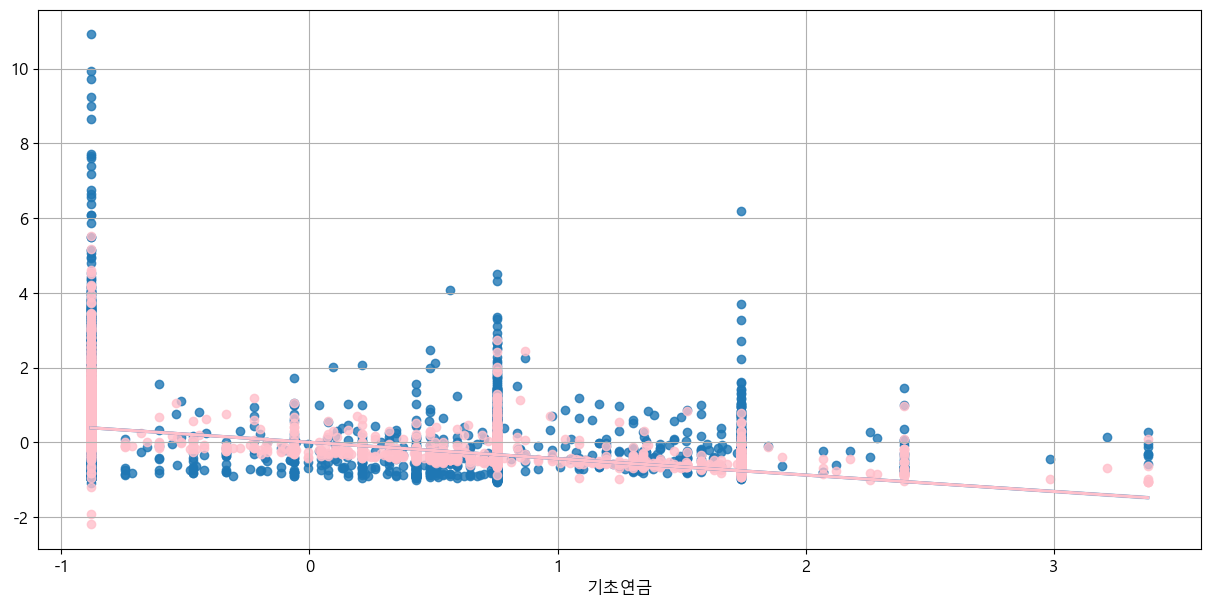

In [160]:
#기초연금에 따른 총생활비 지출

plt.figure(figsize=(15, 7))
sb.regplot(data=target_df, x='기초연금', y='총생활비')
sb.regplot(data=target_df, x='기초연금', y=ols_result.fit.fittedvalues, color='pink')
plt.grid()
plt.plot()
plt.show()

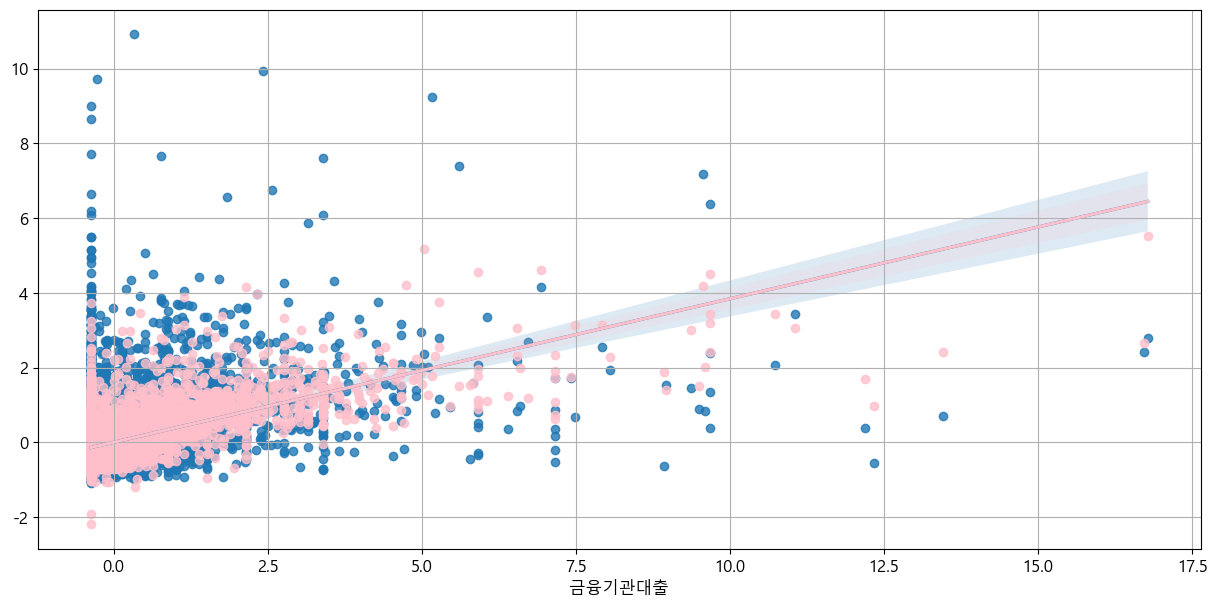

In [161]:
#금융기관대출에 따른 총생활비 지출

plt.figure(figsize=(15, 7))
sb.regplot(data=target_df, x='금융기관대출', y='총생활비')
sb.regplot(data=target_df, x='금융기관대출', y=ols_result.fit.fittedvalues, color='pink')
plt.grid()
plt.plot()
plt.show()

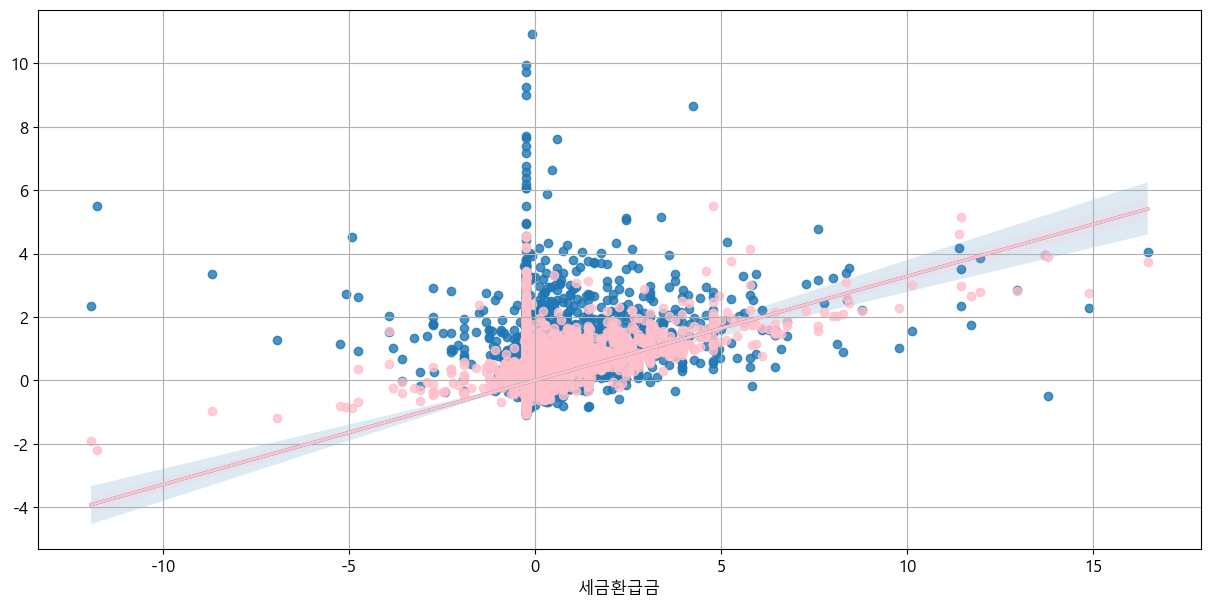

In [162]:
#세금환급금에 따른 총생활비 지출

plt.figure(figsize=(15, 7))
sb.regplot(data=target_df, x='세금환급금', y='총생활비')
sb.regplot(data=target_df, x='세금환급금', y=ols_result.fit.fittedvalues, color='pink')
plt.grid()
plt.plot()
plt.show()

In [ ]:
# # 회귀분석

# ols_result = myOls(df3, y='총생활비', x=best_names)
# print(ols_result.summary)

In [ ]:
# #결과 보고

# ols_result.table

In [ ]:
# print(ols_result.result, end="\n\n")
# print(ols_result.goodness, end="\n\n")
# for i in ols_result.varstr:
#     print(i)

In [ ]:
# #유의하지 않은 요인 제거 후 재시도

# df4 = df3.drop(['기타_소득','기타이자'], axis=1)
# df4

In [ ]:
# #pca에 분석 결과 나온거에서 기타_소득 제거
# names_to_remove = ['기타이자', '기타_소득']
# for name in names_to_remove:
#     best_names.remove(name)
# best_names

In [ ]:
# # 회귀분석

# ols_result = myOls(df4, y='총생활비', x=best_names)
# print(ols_result.summary)

In [ ]:
#결과 보고

# 다중 회귀 분석 확인 결과 Durbin watson의 경우 1.869로 2에 근접하여 다중회귀분석모형에 적합하였다.
# VIF값은 10미만으로 각 요인별 다중공선성이 없는것으로 확인되었다.
# Adj. R-squared 값은 0.385로 약 39%의 설명력을 나타낸다.
# 𝐹(369.5), 유의확률(0.00)로 통계적으로 유의미하며 모집단에서도 의미있다고 볼 수 있다.
# 총생활비에 가장 큰 영향을 미치는 3가지 요소는 다음과 같다.

# 1)기초연금: 회귀계수는 -0.2770(p<0.05)로 음수이다. 이는 곧 총생활비와 기초연금 간에는 음의 상관관계가 있고
# 이 말은 기초연금 금액이 증가할 수록 총생활비가 감소한다는 것을 의미한다.
# 기초연금은 65세 이상 노인들이 받는 연금으로서 이 말을 데이터 수치만 보고 해석해보자면 노인일수록 생활하는데
# 지불하는 비용이 적어진다는 것을 추론 할 수 있다.(즉 돈을 많이 쓰지 않는다는 말과 같다.)

# 2)금융기관대출: 회귀계수는 0.2212(p<0.05)로 양수이다. 이 말은 총생활비와 금융기관대출 간에는 양의 상관관계가 있고
# 대출액이 많을 수록 총생활비도 증가한다는 것을 의미한다.

# 3)세금환급금: 회귀계수는 0.2092(p<0.05)로 양수이다. 이 말은 총생활비와 세금환급금 간에는 양의 상관관계가 있꼬
# 환급액이 많을 수록 총생활비도 증가한다는 것을 의미한다.


In [ ]:
#결과값을 토대로 잔차가 정규성을 따르는지 Q-Q plot을 통해 확인해본다.

sdf = DataFrame({
    "관측값": df3['총생활비'],
    "예측값": ols_result.fit.fittedvalues,
    "잔차": ols_result.fit.resid,
    "zscore": stats.zscore(ols_result.fit.fittedvalues)
})

sdf

,관측값,예측값,잔차,zscore
0,-0.148503,0.354703,-0.503207,0.571516
1,-0.281743,-0.536705,0.254962,-0.864765
2,-0.588933,0.020979,-0.609912,0.033803
3,0.835987,-0.568731,1.404718,-0.916368
4,-0.851711,-0.499341,-0.352370,-0.804563
...,...,...,...,...
7854,0.254916,0.409539,-0.154623,0.659869
7855,1.479977,1.543344,-0.063367,2.486712
7856,1.035846,0.854696,0.181150,1.377128
7857,0.913710,0.312366,0.601344,0.503300


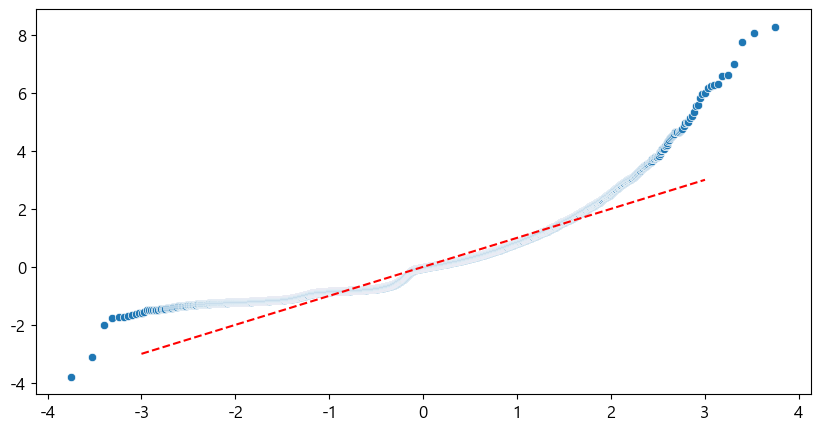

In [ ]:
(x, y), _ = stats.probplot(sdf['zscore'])

plt.figure(figsize=(10, 5))
sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')
plt.show()
plt.close()

In [ ]:
#q-q plot확인 결과 처음 부분과 끝 부분이 정규분포를 따르지 않는것으로 확인되었다.
#이 부분은 아마 독립변수별로 편차가 커서 나오는 부분이라고 예상된다.